# [Public Policy 275] Spatial Data and Analysis, Fall 2019

# Lab 3: Point Processes

* University of California, Berkeley
* Instructor: Solomon Hsiang
* TA: Luna Yue Huang

**About This Lab**
* Due Date: Sep 18, 2019
* You may talk with other students about the lab, but each student is responsible for doing all exercises in the lab themselves and turning in their own write up. We will be checking code for evidence of copying and pasting.
* When you are done with the lab, please restart the kernel and run all the codes one more time (press the ">>" button), so that the grader will see a clean notebook. Don't forget to save! Please submit this lab to bCourses as `YOURCAL1ID.ipynb`. This will facilitate anonymous grading.
* The class just recently transitioned from Matlab to Python. This is a newly developed assignment, so if you think there is an error or something is unclear, let us know right away. That will be extremely helpful to us and your fellow students.
* This lab requires that you download the following files and place them in the same directory as this jupyter notebook:
    * `Lab3_crime.csv`
    * `Lab3_cholera.p`
    * `Lab3_poisson_test_data.p`
* These labs have been developed over the years by Solomon Hsiang, and past/current GSIs including Ian Bolliger, Tamma Carleton, Shubham Goel, Felipe González, Luna Yue Huang, Jonathan Kadish, and Jonathan Proctor (in alphabetical order).

## Objectives
By the end of this lab, you will be able to
1. Get to know `pandas`
2. Understand functions, classes, attributes and methods in Python
3. Run simulations

In [44]:
# IMPORT MODULES HERE
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Analyzing Crimes by Attributes
Use the dataset `Lab3_crime.csv`, it contains the location of 200 crimes as well as information on whether the crime was violent (the variable `violent`=1 if violent, 0 otherwise) and the month in which the crime was committed (the variable `month`). Here we want to see if there are any patterns in crime based on their attributes.

**1.1.**

So far, we have worked with vectors and arrays where information across different vectors might be related (e.g., the first element in a vector lat and a vector lon describe the same position), but we had to keep track ourselves of these various relationships. However, Python will allow us to link vectors or arrays of strings the way we sometimes see datasets structured in the software packages Excel, Stata or R, where individual rows represent observations and columns are different variables. This data format is more restrictive than what we have done so far, but it is often convenient for working with data sets that come in this format since it may help us keep variables organized. To work with data in this format, we can utilize the data structure table, or `DataFrame`, as Python calls it. This data format is also useful because it allows us to read in data from these familiar software packages (keeping strings and numeric data grouped properly) so we can manipulate it in Python. From now on, we will be seeing a lot of the `pandas` module, which is what handles data frames in Python.

To use pandas, you would want to first `import` the pandas module (you don't need to install it because it comes with the Anaconda distribution). The convention is to alias it with `pd`, so you would do `import pandas as pd`. Then you would want to read a csv file (using `pd.read_csv()`) and assign it to `df`, which is what people usually call their data frames. Type the variable name `df` to print the data frame in jupyter notebook, and you will see a nicely formatted table.

**Let's make a map of all crime events. Choose a symbol that we haven't used before.**

(Hint: `pandas.DataFrame` is very much like a dictionary. So you can access columns with `[]`, e.g., `df['violent']` gives the `violent` column in the data frame. A one-column object is called a `pandas.Series`, e.g., `df['violent']` is a pandas series. matplotlib works well with pandas, so you can directly pass a pandas series (as we did with numpy arrays) to `plt.plot()` in order to plot maps (no need to convert it to numpy objects!).)

In [45]:
# TODO: READ THE DATASET, PLOT THEIR GEOGRAPHICAL LOCATIONS
df = pd.read_csv('Lab3_crime.csv')


In [46]:
df.head()

,violent,month,crime_x,crime_y
0,0,5,2.142546,1.908561
1,1,6,0.934388,4.375143
2,0,11,-4.340055,2.053631
3,0,3,4.478405,-7.323084
4,0,8,-2.776546,4.977263


Text(0.5, 1.0, 'Geographical locations of all Crimes')

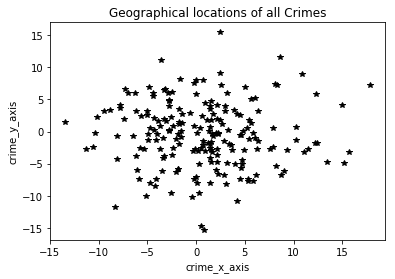

In [47]:
## PLOT GEOGRAPHICAL LOCATIONS
plt.plot(df['crime_x'],df['crime_y'],'k*')
plt.xlabel('crime_x_axis')
plt.ylabel('crime_y_axis')
plt.title('Geographical locations of all Crimes')

**1.2.**

Now we want to see if the spatial pattern in violent and non-violent crime is different by plotting them as two different kinds of symbols. We could do this by writing a loop like we did for houses in Lab 2, but this is slow. Python has a simple notation that allows us to more easily isolate observations. This is usually called boolean (a boolean variable takes two values, True or False) indexing. Basically, we want to create a vector (more precisely, a `numpy.ndarray` or a `pandas.Series`) that has the same number of rows as our data frame, and takes on either `True` or `False`, and we will extract all the rows in the data frame with a corresponding `True` value in the vector.

Type `df['violent'] == 1` first and watch what happens.

The double-equal sign `==` tells Python to check for equality, rather than assigning values (`a = 1` means "assign a equal to one," while `a == 1` means "check if a is equal to 1"). `df['violent'] == 1` lets Python return a new vector that is True for each row where the statement is True (the incident is violent), and False where it is False (the incident is non-violent). We can use boolean indexing to identify the crime observations based on the attributes of crimes (whether it is violent, in which month it occurred, etc.).

Boolean indexing in pandas can be achieved through `df.loc[row_index, col_index]`. You have to specify two indices, one for row and one for column. For the rows, put the boolean vector in the square brackets and you will get the subset of rows (where the boolean vector says `True`). For the columns, put in `:` to mean that you are selecting all the columns, or put in a string (column name) to select one column.

**Now, plot the spatial distribution of violent and non-violent crimes on the same map, using different markers for the two. Be sure to label the plot properly.**

In [48]:
#df['violent'] == 1


In [49]:
## plot the spatial distribution of violent and non-violent crimes on the same map, 
## using different markers for the two.
'''
plt.plot(df[df['violent'] == 1]['crime_x'],df[df['violent'] == 1]['crime_y'],'rs')
plt.plot(df[df['violent'] == 0]['crime_x'],df[df['violent'] == 0]['crime_y'],'b^')
plt.xlabel('crime_x_axis')
plt.ylabel('crime_y_axis')
plt.legend(['Voilent','Non-voilent'])
plt.title('Geographical locations of Voilent vs Non-voilent crimes')
'''

"\nplt.plot(df[df['violent'] == 1]['crime_x'],df[df['violent'] == 1]['crime_y'],'rs')\nplt.plot(df[df['violent'] == 0]['crime_x'],df[df['violent'] == 0]['crime_y'],'b^')\nplt.xlabel('crime_x_axis')\nplt.ylabel('crime_y_axis')\nplt.legend(['Voilent','Non-voilent'])\nplt.title('Geographical locations of Voilent vs Non-voilent crimes')\n"

### [Quick Aside] Coding Style: Maximum Line Length
It is never too early to talk about coding style. PEP-8, the official Python style guide, says that each line of code should not exceed 79 characters. So when you write codes, it is important to wrap long lines appropriately.

Why is that? First, most code editors (this applies to Jupyter Notebook, too) do not wrap lines by default. For a language like Python, where line breaks and leading white spaces have semantic meaning, wrapping lines would make codes confusing to the readers. Second, super long lines are almost impossible to read.

In [50]:
'wouldn\'t you hate to read this line of code that is so incredibly very very very very very very very very very very very very long?'

"wouldn't you hate to read this line of code that is so incredibly very very very very very very very very very very very very long?"

The right way to wrap long lines is to use Python's implied line continuation inside parentheses, brackets and braces. If necessary, you can add an extra pair of parentheses around an expression. Here are some good practices.

```python
# implied line continuation inside parentheses
function(param1=argument1,
         param2=argument2,
         param3=argument3,
         param4=argument4,
         param5=argument5,
         param6=argument6)
# sometimes people like to do this
# enter a line break right after the parenthese/brackets/braces
# and indent by 4 spaces
d = {  # this is creating a dictionary
    'key1': 'value1',
    'key2': 'value2',
    'key3': 'value3',
    'key4': 'value4',  # leaving a comma here is fine
}
# for long strings, and with .format()
print('{} a long long string '
      'that is broken into several parts'
      .format('this is'))
```

Text(0.5, 1.0, 'Geographical locations of Voilent vs Non-voilent crimes')

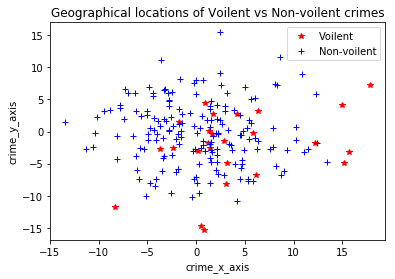

In [51]:
# TODO: PLOT YOUR MAP HERE
# USE DIFFERENT MARKERS FOR VIOLENT VS NON VIOLENT EVENTS
# WRAP LONG LINES APPROPRIATELY
# MAKE SURE THAT EACH LINE DOES NOT EXCEED 79 CHARACTERS
## plot the spatial distribution of violent and non-violent crimes on the same map, 
## using different markers for the two.
plt.plot(df[df['violent'] == 1]['crime_x'],
         df[df['violent'] == 1]['crime_y'],'r*')#voilent crimes map
plt.plot(df[df['violent'] == 0]['crime_x'],
         df[df['violent'] == 0]['crime_y'],'b+')#non-voilent crimes map
plt.xlabel('crime_x_axis')
plt.ylabel('crime_y_axis')
plt.legend(['Voilent','Non-voilent'])
plt.title('Geographical locations of Voilent vs Non-voilent crimes')


## More on Indexing in pandas

`df.loc[]` allows us to index **by label**. In pandas, all the rows and columns have labels. Usually, the row labels (a.k.a. indexes) are integers 0,1,2,... (they don't have to be though, they can be strings or other data types), and column names are descriptive strings. For our `df`, each row has a integer ranging from 0 to 199 identifying that observation, and we can select the three observations with the indexes 3, 4 and 5 and assign it to `df1` by doing the following.

In [52]:
df1 = df.loc[[3, 4, 5], :]
df1

,violent,month,crime_x,crime_y
3,0,3,4.478405,-7.323084
4,0,8,-2.776546,4.977263
5,1,8,6.191399,-6.747993


You will notice that the indexes (row labels) are preserved. The first row has an index of 3 instead of 0. Now if you try to do `df1.loc[0, :]`, there will be a `KeyError` because `df1` doesn't have any observations associated with the index 0.

We can, however, also index **by position** by doing `df.iloc[]`. The following will give you the first two observations in `df1`.

In [53]:
df1.iloc[0:2, :]

,violent,month,crime_x,crime_y
3,0,3,4.478405,-7.323084
4,0,8,-2.776546,4.977263


As you've seen, `loc[]` and `iloc[]` take in a variety of types of inputs to index data frames. They take in slice objects (e.g., `0:2`), lists, boolean arrays, etc. The [official documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) goes into more detail on accepted input types.

*Indexing and selecting data in pandas can be rather tricky. It can take some time for beginners to get used to it. Be patient, and always visually check your data frame to make sure that you are doing what you think you are doing!*

**1.3.**

Now examine how the distribution of all crimes evolves month by month by plotting each month separately. To make comparisons across months easier, let's put them all on the same figure as 12 different panels (e.g. January will be a small map next to a separate small map for February). To do this, create a new figure and use the command `plt.subplots()`. subplot will break the figure up into smaller "subplots" while also telling Python which of these subplots you want to be drawing on with your current commands. Type `fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True)` to make an array of 12 subplots (3 down and 4 across), with the same x and y axes.

This way of creating two things at the same time is very Pythonic and is usually called multiple assignment. It helps keep your codes succint and readable. `plt.subplots()` returns two objects, and we name the first one `fig`, which is basically the large plot, and the second one `axes`, which is a collection of subplots. Each subplot can be accessed through `[]`, e.g., `axes[0, 0]` is the first subplot.

We can then specify what we want to do with each subplot. For example, we can do `axes[0, 0].plot(df['crime_x'], df['crime_y'], '+')` to plot onto the first subplot.

**Write a short for loop that goes through the months and plots the locations of all crimes in a month on a separate subplot for that month. Put January in the upper left subplot. Help your viewers understand which month they are looking at by labeling each subplot with a title that says the month number for that subplot.** (Hint: this can be done via `axes[i, j].set_title()` and `''.format()`; if the figure looks awful because the labels are cut out / overlapping with each other, `fig.tight_layout()` usually provides a quick fix.)

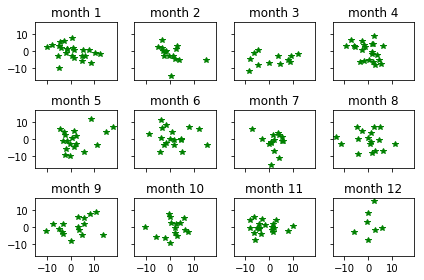

In [54]:
# TODO: PLOT YOUR MAP HERE
fig, axes = plt.subplots(nrows=3, ncols=4, 
                       sharex=True, sharey=True)

k=1  
for i in range(3):
    for j in range(4):
        axes[i,j].plot(df[df['month'] == k]['crime_x'],
         df[df['month'] == k]['crime_y'],'g*')
        axes[i, j].set_title('month {}'.format(k))
        k+=1
fig.tight_layout()

**1.4.**

How many crimes are there in March? How many are violent crimes? (Hint: there are multiple ways to do this, but you may find commands like `df.shape` helpful; you may need to use the logical operator `&` (and).)

In [55]:
# TODO: WRITE YOUR CODES HERE
## number of crimes in march
df[df['month'] == 3].shape # number of crimes = 12

(12, 4)

In [56]:
## number of voilent crimes in march
df[(df['violent'] == 1) & (df['month'] == 3)].shape 
# number of voilent crimes in march = 2

(2, 4)

**1.5.**

Create a new attribute that describes the Euclidean distance from the location of each crime to the nearest violent crime (the value of this new attribute should be zero for all violent crimes). **Plot a histogram showing the distribution of these nearest-violent-crime distances using the command `plt.hist()`. Why does this distribution look the way it does?**

Some tips:

* Write a function that can be re-used so that your future self will thank you!
* You will likely have to write a double loop, where you loop over the set of source points first, and then inside that loop, you loop over the set of destination points.
* `pandas.DataFrame.values` converts the pandas data frame to a numpy array.
* `numpy.ndarray.min(axis=1)` takes the minimum of an array along the columns (`axis=0` takes min along the rows).

In [57]:
from scipy.spatial.distance import squareform, pdist


def compute_distances(src_x, src_y, dst_x, dst_y):
    """Computes the distances from every source point to every destination point.
    
    Args:
        src_x, src_y (numpy.ndarray): the x and y coordinates for source points.
            Denote the length of each array as dim_src.
        dst_x, dst_y (numpy.ndarray): the x and y coordinates for destination points.
            Denote the length of each array as dim_dst.
        
    Returns:
        numpy.ndarray: a dim_src by dim_dst numpy array containing the distances.
    """
    # TODO: COMPLETE THIS FUNCTION
    dist = np.ones((len(src_x),len(dst_x)))
    for i in range(len(src_x)):
        for j in range(len(dst_x)):
            
            
            dist[i,j]=np.sqrt(((src_x[i]- dst_x[j])**2) + ((src_y[i]-dst_y[j])**2))
    #pass

    return dist




In [58]:
# TODO: USING THE FUNCTION, ANSWER THE QUESTION HERE
x1 =df[df['violent'] == 1]['crime_x'].values 
y1 =df[df['violent'] == 1]['crime_y'].values
x2 =df['crime_x'].values
y2 = df['crime_y'].values

dist_vals =compute_distances(x1, y1, x2, y2)
#dist_vals.sort_values(by='order', inplace=True)

min_dist = np.ndarray.min(dist_vals,axis=0)


#dist_vals3
#type(x1.values)

In [59]:
dist_vals

array([[ 2.74657486,  0.        ,  5.76273961, ..., 10.55934002,
         8.79175447,  4.71337053],
       [ 9.55662801, 12.30285839, 13.72516378, ..., 18.56273824,
        17.79120185, 16.28892406],
       [ 4.55747634,  6.99124905,  7.43002924, ..., 15.93772072,
        11.50972894, 10.26142256],
       ...,
       [ 0.8791349 ,  1.86747754,  6.12357233, ..., 11.2695165 ,
         9.71756465,  6.3040941 ],
       [10.0464161 , 12.64877443, 12.54691342, ..., 20.52223064,
        16.4038886 , 15.91256069],
       [ 2.05966303,  4.34977533,  5.96865603, ..., 13.72390725,
        10.02453737,  7.91073293]])

In [60]:
#dist_vals.sort(axis = 0)
#dists =pd.DataFrame(dist_vals)
#dists.loc[:,1]
min_dist

array([ 0.8791349 ,  0.        ,  2.66260296,  1.64009934,  3.68251582,
        0.        ,  4.22169175,  2.09484871,  7.36543054,  1.13149516,
        1.66630082,  5.03644661,  4.82836972,  2.86893991,  3.80984174,
        3.2010648 ,  1.50576346,  5.18555566,  0.31811079,  3.70862061,
        0.73042816,  0.56688501,  1.24436356,  0.70246799,  3.32393812,
        0.        ,  1.28699166,  0.        ,  6.81692965,  1.73562518,
        0.86282532,  0.61008937,  3.85403956,  0.28551496,  1.34117526,
        1.62490183,  1.5388203 ,  5.77113025,  7.58472118,  0.43915313,
        1.94641141,  1.18660251,  0.26057777,  2.45431022,  3.68593659,
        0.        ,  0.9106569 ,  0.62918185,  4.44355515,  0.70986626,
        3.11498893,  2.63286305,  6.48284448,  0.70505336,  1.06184774,
        1.95820884,  0.        ,  1.58387667,  0.52603178,  0.98120008,
        0.        ,  3.44957536,  2.39254425,  0.29887313,  1.69320029,
        2.01101353,  2.54784252,  0.        ,  4.74534699,  0.  

Text(0.5, 1.0, 'Histogram of distances for Voilent Crimes')

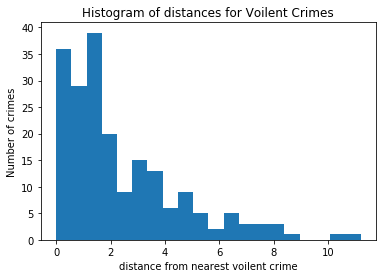

In [61]:
#Plot Histogram
plt.hist(min_dist,bins =20)
plt.xlabel('distance from nearest voilent crime')
plt.ylabel('Number of crimes')

plt.title('Histogram of distances for Voilent Crimes')


[TODO: ANSWER THE QUESTION HERE]

## Introducing the `.` in Python
### Namespace

I think of name space as literally a "name space": we create a space for every name (variable names, class names, function names) that is defined in our current environment. Namespace is like a dictionary, a mapping between names and objects - it helps python understand what we mean when we type certain names. If we were to put all the names together in the global namespace (like R does) and make them easily accessible, we can potentially create chaos. What if popular keywords such as `filter`, are claimed by multiple packages (this is true in R)? How would R then know which function to call, and how would we know which function we are calling (we sometimes don't!). This can be very error prone.

Python's approach to reducing overcrowding in these "name spaces" is to let each package have their own namespaces, and we can access their namespaces by using the dot notation, so `numpy.array()` means: the `array()` function in the `numpy` module. There can also be submodules (`numpy.random.random()` means the `random()` function in the `random` submodule in the `numpy` module). This leads to somewhat more verbose but much clearer and more predictable codes, which is particularly important for a multi-purpose language like Python (imagine how many packages would define their own `open()` function!).

In [62]:
# a really useful Jupyter Notebook magic command is %who
# it will list all the names that are defined in the current environment
%who
# notice that the reserved keywords in core Python are not listed here

DISTANCES	 K	 Lambda	 area	 axes	 cholera	 cholera_x	 cholera_y	 compute_distances	 
data	 df	 df1	 dist_vals	 f	 fig	 grid_x	 grid_y	 h	 
i	 j	 k	 min_dist	 np	 pd	 pdist	 pickle	 plt	 
squareform	 weights	 x	 x1	 x2	 x_test	 y	 y1	 y2	 
y_test	 z	 


In [63]:
# the python command to do this is dir()
dir()
# you will notice that the outputs from here are messier
# and many internal variables are exposed
# because a lot is happening as Jupyter Notebook
# hosts this very nice environment for you to work in
# notice that the reserved keywords in core Python are not listed here
# but you can see them with `dir(__builtins__)`
# and they are still directly accessible to you

['DISTANCES',
 'In',
 'K',
 'Lambda',
 'Out',
 '_',
 '_10',
 '_12',
 '_13',
 '_16',
 '_17',
 '_18',
 '_20',
 '_25',
 '_28',
 '_29',
 '_3',
 '_30',
 '_31',
 '_34',
 '_36',
 '_37',
 '_38',
 '_4',
 '_43',
 '_46',
 '_47',
 '_49',
 '_50',
 '_51',
 '_52',
 '_53',
 '_55',
 '_56',
 '_59',
 '_6',
 '_60',
 '_61',
 '_7',
 '_8',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i26',
 '_i27',
 '_i28',
 '_i29',
 '_i3',
 '_i30',
 '_i31',
 '_i32',
 '_i33',
 '_i34',
 '_i35',
 '_i36',
 '_i37',
 '_i38',
 '_i39',
 '_i4',
 '_i40',
 '_i41',
 '_i42',
 '_i43',
 '_i44',
 '_i45',
 '_i46',
 '_i47',
 '_i48',
 '_i49',
 '_i5',
 '_i50',
 '_i51',
 '_i52',
 '_i53',
 '_i54',
 '_i55',
 '_i56',
 '_i57',
 '_i58',
 '_i59',
 '_i6',
 '_i60',
 '_i61',
 '_i62',
 '_i63',
 '_i7',


In [64]:
# I don't like df1 since it is a temporary variable
# let's delete it
del(df1)

### Object Oriented Programming
What is object oriented programming? It is a paradigm where objects are at the center of the design of the language, not only representing the data, but in the overall structure of the program as well. It is often contrasted with functional programming, where functions are at the center.

Python is an object oriented language, whereas some other languages, such as R and Matlab, are more functional (in the sense that most scripts that we see in R/Matlab are more functional). Both R and Matlab are growing in the OOP direction, though, and both support the OOP paradigm.

In Python, there are many `class`es of `object`s. Each `class` has many `attribute`s and `method`s. An attribute is a "field" that stores data within the object, and a method is like a function, but defined solely on this particular class. A feature of objects is that an object's procedures can access and often modify the data fields of the object with which they are associated (objects have a notion of `self`), which essentially means, altering the persistent "state" of the object.

For example, suppose we have a data frame `df` (assuming that `df` is an `instance` of the `class` `pandas.DataFrame`), and we want to sort the rows based on its values in a certain column `order`. In Python, we would do this

```python
df.sort_values(by='order', inplace=True)
```

The dot between `df` and `sort_values()` denotes that the latter is a method of the former. So this is essentially saying that we take the object `df`, and we change the data within that object by calling the method `sort_values()`. Notice that we did not pass `df` to `sort_values()` in an argument! So how did the function know what it is supposed to perform the operation on? It implicitly remembers its "parent" (there is a strong convention in Python to call its "parent", the object, `self`).

This would normally not be done in functional programming languages, such as R. In R (tidyverse), we would do this

```R
df = dplyr::arrange(df, order)
```

Notice that we have to tell the function `arrange()` that we want it to perform sorting on `df`, the first argument that we passed into the function. This is sometimes called a "pure" function: it does not alter the input, create any "side effects" (do anything other than generating the output), and all it does is returning the output.

This may seem like a subtle difference at first, but it profoundly impacts the way that codes are structured in these programming languages. As we spend more and more time working in Python, and as we approach problems that are more and more complicated, this will become more obvious.

All the Python modules are written in an object oriented manner. For example, `pandas` has a couple of important classes: `pandas.Series` and `pandas.DataFrame`, each of these have many, many methods that you can take advantage of to organize and modify your data frames. Note that all modifications are by default not in place (a new object is returned and the original object is not modified) unless the user specified `inplace=True`.

### Reading Documentation

Now let's try to read the pandas [official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html).

Browse the webpage and click on [general functions](https://pandas.pydata.org/pandas-docs/stable/reference/general_functions.html). These are the "pure" functions that pandas defined. You would call them like this: `pd.concat()`.

Click on `concat()` and you will see this:

```python
pandas.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
```

Lots of arguments! This is typical as pandas is a versatile package. The parameters without default values (`objs`) are the ones that you must pass arguments for (otherwise an error will be raised). If you want to override a default value, you can do that by passing that argument into the function, e.g., `pd.concat(df1, df2, axis=1)`. The documentation should explain what parameter does what.

Now, browse the home webpage and click on [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html), which is perhaps the most important class in pandas. Click on [Constructor](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) - this explains how you could create a new `pandas.DataFrame` instance. Scroll down and you'll see that all the attributes and methods are listed. Attributes can be accessed through the dot notation (e.g., `df.columns` gives a list of column names). Methods can be called also using the dot notation (e.g, `df.describe()` describes the dataset). Click on any attribute or method to see the documentation of those, along with some examples.

From now on, we will not be providing as many hints and explanations as before, as we will be assuming that you know how to find and read documentation.

## 2. Identifying Cholera Infection Hotspots
The dataset `Lab3_cholera.p` contains the location of cholera cases during an outbreak (the sample was collected over one month). Your job is to identify cholera hotspots so that public health workers can figure out where the pathogens are coming from. To do this, you will have to estimate the intensity of cholera cases over the entire region (for values of x ranging from 1-10 and values of y ranging from -10 to +10).

We will not use only the quadrat or kernel estimation techniques that we learned in class. Instead, we'll use a simple hybrid of the two. Imagine drawing a grid with lines at each integer value in x and at each integer value in y (this looks like a normal grid). We will go to each location $\overrightarrow{\underset{\cdot}{c}}$ where these lines intersect and we will construct an estimate for the rate at which cholera cases arise (the infection rate) at that location $\lambda(\overrightarrow{\underset{\cdot}{c}})$ by using a kernel estimate.

The kernel we'll use is sometimes called the "uniform kernel" because it assigns all observations uniform weight so long as they are within a certain cutoff distance $h$ (the cutoff distance is the bandwidth for this particular kernel). Imagine that we are standing at a point $\overrightarrow{\underset{\cdot}{c}}$, a lattice point on our grid. We draw a circle of radius $h$ around our location. If any events occur within that circle, we count those events and assign them to our location $\overrightarrow{\underset{\cdot}{c}}$ as an infection. However, because the infection rate $\lambda(\overrightarrow{\underset{\cdot}{c}})$ describes $\frac{infections}{area}$, we must adjust this count for the area we are examining. In the case of this uniform kernel, the area we examine covers $\pi \times h^2$ with uniform weight, so we divide our infection count by this area to compute the rate of infection per unit area. We'll look for infection hotspots by plotting these infection rate estimates in a bubble plot, with larger bubbles depicting higher infection rates.

**2.1.**

Begin by making sure that you understand the procedure. We will look at the set of points $\overrightarrow{\underset{\cdot}{s}}=[x,y]$ where we use each pairwise combinations from the two sets
$$x \in \{1,2,3,...,10\}$$
$$y \in \{-10,-9,-8,...,10\}$$
(Hint: you may want to draw this grid on scrap paper.) For each $\overrightarrow{\underset{\cdot}{s}}$, we compute the Euclidean distance to the location of each cholera infection in the dataset. We then generate a new vector that is the weighted count of infections for $\overrightarrow{\underset{\cdot}{s}}$, where the weights are determined by each infection site's distance from $\overrightarrow{\underset{\cdot}{s}}$. The weights are determined by the kernel function, which in this case is the uniform kernel:

$$
\kappa_{unif}\left(\frac{dist(\overrightarrow{\underset{\cdot}{s}}, \overrightarrow{\underset{\cdot}{s_{inf\_site}}})}{h}\right)=\mathbf{1}\left[ \left(\frac{dist(\overrightarrow{\underset{\cdot}{s}}, \overrightarrow{\underset{\cdot}{s_{inf\_site}}})}{h}\right) < 1 \right] \times \frac{1}{\pi}
$$

Where $dist(\cdot)$ is the distance function, $\overrightarrow{\underset{\cdot}{s}}_{inf\_site}$ is the site of an infection event and $\mathbf{1}[\cdot]$ is the indicator function that is one if the statement in brackets is true. All this equation says is that an infection event is given a weight of one if its distance to the lattice point is less than $h$ (or equivalently that the distance divided by $h$ is less than one). The factor $\frac{1}{\pi}$ is just there to account for the circular structure of the area we are examining, as described above. (Hint: you may want to draw the shape of this kernel function on a sheet of scrap paper, where the horizontal axis is the distance from $\overrightarrow{\underset{\cdot}{s}}$ and the vertical axis is $\kappa$). Just like normal kernel estimation that we covered in class, we then estimate the infection rate at $\overrightarrow{\underset{\cdot}{s}}$ by summing up these weighted values for all of the infection sites, which we index by $j$:
$$
\hat{\lambda}(\overrightarrow{\underset{\cdot}{s}}) = \sum_{j=1}^{N}\left[ \frac{1}{h^{2}}\times \kappa_{unif}\left(\frac{dist(\overrightarrow{\underset{\cdot}{s}}, \overrightarrow{\underset{\cdot}{s_{inf\_site\;j}}})}{h}\right)\right]
$$
which after subsitution and a little simplification looks less intimidating:
$$
\hat{\lambda}(\overrightarrow{\underset{\cdot}{s}}) =\frac{1}{\pi h^{2}} \times \sum_{j=1}^{N} \mathbf{1}\left[ dist(\overrightarrow{\underset{\cdot}{s}}, \overrightarrow{\underset{\cdot}{s_{inf\_site\; j}}})< h \right]
$$
The estimate for the infection rate at a location is just sum of several 1's and 0's, scaled by the area of a circle. The main challenge is to figure out which infection events to count as a 1 and which to count as a 0, which we do by measuring the distance to each event.

Write a script that estimates $\hat{\lambda}(\overrightarrow{\underset{\cdot}{s}})$ at each lattice point using the approach above. Some tips:

* You should write your script so that the bandwidth variable `h` is defined once and only once, and you then just refer to this variable at subsequent points in the script (so you can easily change the bandwidth). In your first run, use `h=2`. This means we assign an infection to a lattice point if it's less than 2 units away.
* In Python you can get the constant $\pi$ by just typing `np.pi`. In your code, you can use `np.pi` as if it were a variable.
* Use the function that you wrote for problem 1, and thank your past self for writing a generalizable function!
* In order to use the function that you wrote, you need to change how you represent your lattice point coordinates. Think about what form of input the function takes in, and how to construct that input. You may need to use `numpy.meshgrid()` and `numpy.ndarray.flatten()`.
* By default, logical and arithmetic operators in Python are executed on each element of a matrix/array, rather than on the entire matrix as a whole (matrix multiplication and exponentiation are also operations that Python performs, but you need to call other functions to do that). If you use these element-wise operations, Python returns a matrix that this the same size as the original. For example, if you type `a > 0`, python will check each element of `a` and give this element a value of `True` if it is positive and `False` otherwise. If `a` and `b` are vectors (`numpy.ndarray`) of the same size, then `a * b` means Python should multiply the first element in `a` by the first element in `b` and return this value into the first element of the new vector. It will then multiply the second element in `a` by the second element in `b`, and so on. If you type `a ** 2`, then each element in `a` is squared, rather than the entire matrix being matrix-multiplied against itself.

In [65]:
# TODO: LOAD DATA, CONSTRUCT THE GRID, COMPUTE DISTANCES HERE

with open('Lab3_cholera.p', 'rb') as f:
    # we load the file by calling pickle.load()
    # and then assign it to d, which is a short name that we gave to this dict
    cholera = pickle.load(f)

cholera_x = cholera['cholera_x']
cholera_y = cholera['cholera_y']

In [66]:
#defining grid in 2D numpy array with first row being x coordinates 
# and second row y coordinates

grid_y = []
grid_x = []
for i in range(1,11):
    for j in range(-10,11):
        grid_x.append(i)
        grid_y.append(j)



In [67]:
#grid_x

In [68]:
## COMPUTing DISTANCES 
DISTANCES =pd.DataFrame(compute_distances(grid_x, grid_y, cholera_x, cholera_y))
DISTANCES

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,11.821701,6.357108,15.744625,12.445757,9.976527,8.962235,21.947593,12.487395,16.141718,19.325902,...,11.123087,13.683141,9.595332,8.911584,9.148340,9.705213,12.820484,16.250983,12.417145,9.444722
1,10.955644,5.549545,14.855902,11.541040,9.036466,8.057915,21.026763,11.746157,15.195268,18.415250,...,10.134923,12.688650,8.708548,8.344504,8.220371,8.882191,11.822605,15.315509,11.430889,9.156336
2,10.114329,4.814777,13.982218,10.653372,8.110755,7.179021,20.113495,11.045786,14.256131,17.514348,...,9.149332,11.695099,7.849026,7.864171,7.311420,8.099103,10.825119,14.388717,10.447248,8.970742
3,9.304470,4.191265,13.126577,9.787393,7.204928,6.336141,19.208868,10.394546,13.325853,16.624780,...,8.167245,10.702749,7.026778,7.487297,6.429560,7.368691,9.828143,13.472399,9.467034,8.894377
4,8.535027,3.735147,12.292747,8.949402,6.327528,5.545721,18.314163,9.802233,12.406428,15.748469,...,7.190098,9.711969,6.256517,7.230079,5.587630,6.708186,8.831850,12.568847,8.491435,8.930042
5,7.817940,3.512257,11.485479,8.148038,5.492198,4.833567,17.430906,9.280137,11.500459,14.887754,...,6.220218,8.723292,5.559892,7.105524,4.806660,6.140188,7.836503,11.681022,7.522248,9.076419
6,7.168940,3.566592,10.710782,7.395219,4.721321,4.239306,16.560930,8.840709,10.611393,14.045504,...,5.261628,7.737527,4.967978,7.120597,4.121451,5.692456,6.842512,10.812800,6.562314,9.328296
7,6.608118,3.886541,9.976244,6.707309,4.051852,3.818384,15.706443,8.496783,9.743858,13.225246,...,4.321844,6.755947,4.522080,7.274431,3.587301,5.395017,5.850570,9.969304,5.616379,9.677439
8,6.159605,4.414728,9.291397,6.106286,3.541770,3.631584,14.870114,8.260296,8.904149,12.431334,...,3.416423,5.780685,4.268209,7.558556,3.278887,5.273363,4.861929,9.157368,4.692916,10.113780
9,5.849295,5.086694,8.668025,5.620094,3.266614,3.714398,14.055185,8.140619,8.100924,11.669148,...,2.581774,4.815581,4.240991,7.959033,3.260900,5.339523,3.879118,8.386164,3.808308,10.626583


In [69]:
# define bandwidth
h = 2
weights =DISTANCES <= h

# TODO: CALCULATE YOUR lambdas HERE
area = (1/(np.pi * (h**2))) 
Lambda = area * np.sum(weights,axis =1)

#weighted_dist 

In [70]:
Lambda

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7      0.000000
8      0.000000
9      0.000000
10     0.079577
11     0.159155
12     0.318310
13     0.238732
14     0.238732
15     0.079577
16     0.000000
17     0.000000
18     0.000000
19     0.000000
20     0.000000
21     0.000000
22     0.000000
23     0.000000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28     0.079577
29     0.079577
         ...   
180    0.000000
181    0.079577
182    0.079577
183    0.159155
184    0.159155
185    0.159155
186    0.159155
187    0.159155
188    0.079577
189    0.000000
190    0.000000
191    0.079577
192    0.079577
193    0.079577
194    0.159155
195    0.079577
196    0.000000
197    0.079577
198    0.079577
199    0.079577
200    0.079577
201    0.000000
202    0.000000
203    0.079577
204    0.000000
205    0.000000
206    0.159155
207    0.079577
208    0.159155
209    0.079577
Length: 210, dtype: floa

**2.2.**

**2.2.1.**

Once you have computed the infection rate at a lattice point, plot it in the bubble plot map. If a lattice point has a non-zero infection rate, plot a red dot. We want to make the dot larger where there are more infections, so we tell Python to set the marker size property to be proportional to `lambas`. Adjust the aesthetics of the graph to make it readable. Hint: use `plt.scatter()` and take advantage of the `s` (size) parameter.

**2.2.2.**
Overlay the locations of the actual infection events using a different marker (that doesn't change size). Do you think this approach identifies the spatial distribution of infection risk well?

Text(0.5, 1.0, 'Infection rate Bubble plot map with h = 2 ')

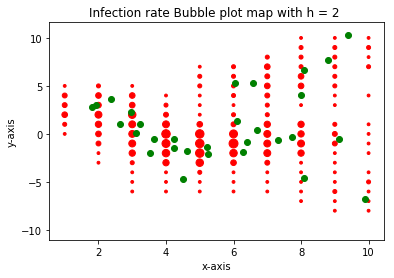

In [71]:
# TODO: PLOT YOUR MAP HERE
plt.scatter(grid_x,grid_y,s=100*Lambda, color ='r')
plt.scatter(cholera_x,cholera_y, color ='g')

plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Infection rate Bubble plot map with h = 2 ' )



[TODO: ANSWER THE QUESTION HERE]

2.2
This approach does a decent job of identifying the spatial distribution of infection risk. Although there are some areas where the infection occurences are less dense that are less well defined by our cut off of h=2.

**2.3.**

**Rerun your code, but change the bandwidth to `h=1`. Rerun it again but use `h=3`. Turn in both of these maps. How do your three estimates for infection rates compare? Why? What is the advantage or disadvantage of using a larger bandwidth? Do the different bandwidths identify the same infection hotspots?**

Text(0.5, 1.0, 'Infection rate Bubble plot map with h = 1')

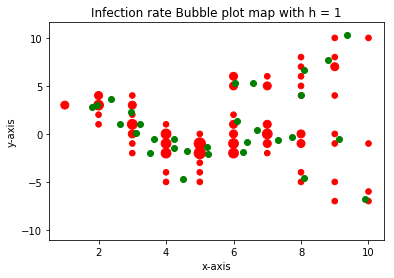

In [72]:
# TODO: PLOT YOUR MAP FOR h=1 HERE
h = 1
weights =DISTANCES <= h
area = (1/(np.pi * (h**2))) 
Lambda = area * np.sum(weights,axis =1)

# TODO: PLOT YOUR MAP HERE
plt.scatter(grid_x,grid_y,s=100*Lambda, color ='r')
plt.scatter(cholera_x,cholera_y, color ='g')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Infection rate Bubble plot map with h = 1' )

### qualitative answer

Text(0.5, 1.0, 'Infection rate Bubble plot map with h = 3')

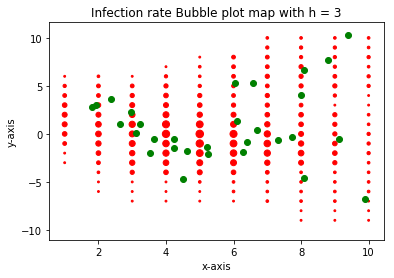

In [73]:
# TODO: PLOT YOUR MAP FOR h=3 HERE
h = 3
weights =DISTANCES <= h
area = (1/(np.pi * (h**2))) 
Lambda = area * np.sum(weights,axis =1)

# TODO: PLOT YOUR MAP HERE
plt.scatter(grid_x,grid_y,s=100*Lambda, color ='r')
plt.scatter(cholera_x,cholera_y, color ='g')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Infection rate Bubble plot map with h = 3' )

### qualitative answer

[TODO: ANSWER THE QUESTION HERE]

2.3

As h increases, the accuracy of our approach decreases . That means that for h=1 , the approach fits the data more closely than the h=2 and h=3 cases. This relationship occurs because the smaller the bandwidth sizes, the closer we are to each occurence being described and as such the approach should fit the data more tightly.

Some disadvantages of using larger bandwidths is that the resulting approach may mot fit the data very closely especially with increasing bandwidth size. However an advanhtage of larger bandwidth is that in emables us to aggregate points, reducing complexity of data. In addition, very small bandwidths may lead to the creations regions having a very high probability of no occurences. this them breaks the counting process sturture. 

Form observations, different bandwidths tend to identify the similar hotspots. However, the set of hotspots may get smaller as bandwidth increases. 

## 3. Let's Go Fishing: Simulating Poisson Clustering
Here you will generate synthetic data that will simulate a Poisson point process (PPP). You'll then compute the K-function for several of your simulations to evaluate the clustering of data in a Poisson point process.

[TODO: Answer the question here]

3.1
Lambda  = 1.2 events per unit area (or 120 per 100 units of area) and Lambda here means that there are on average 1.2 events happening per unit area of the space. Or the intensity of the number of events is 1.2 and it is uniform across the area


**3.2. Let's simulate this PPP.**

**3.2.1.**

Since the total number of events $z$ must follow a Poisson distribution, draw a random number from this distribution. Since the expected number of events is 120, draw the random variable $z$ using the function `np.random.poisson(lam=120)`.

In [74]:
z = np.random.poisson(lam=120)

**3.2.2.**

The location of these z events are completely random over the area we are considering, so we can draw their x and y locations from a uniform distribution that goes from zero to ten. Since x and y are uncorrelated, draw these random variables (actually vectors) separately with the function `np.random.random`. We now have the locations of observations for a single simulated realization of our PPP. Plot the observations from this realization.

In [75]:
#grenerating x and y
x = 10* np.random.random(z)
y = 10* np.random.random(z)

Text(0.5, 1.0, 'An Instance of randomly generated locations of z events')

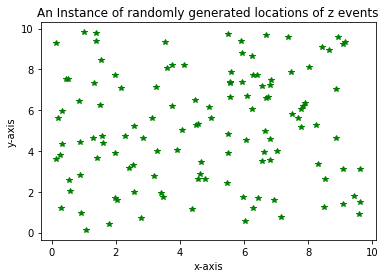

In [76]:
#plotting randomly generated locations
plt.plot(x,y,'g*')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('An Instance of randomly generated locations of z events')

**3.2.3.**

Repeat this process 3 times. Each time you will draw a new value for z, x and y. How do they compare to one another? Are you surprised?

Hint: to repeat this process 3 times, you will want to write a for loop with `range(3)`, some would write `for i in range(3):` but we don't actually need to store `i` because we don't need to keep track of the number of simulations already run. Python has a very nice feature called throwaway variable `_`, and you could write `for _ in range(3):` so that the `_` variable is thrown away. This is not only memory efficient but also syntactically clear. The readers of these codes will know "oh, you are not planning to do anything with this variable".

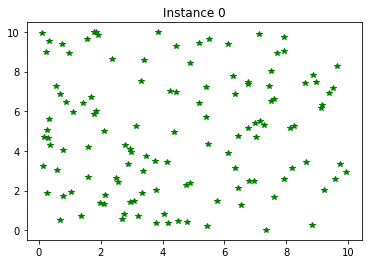

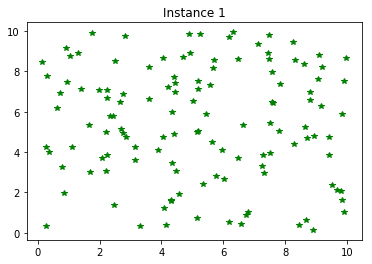

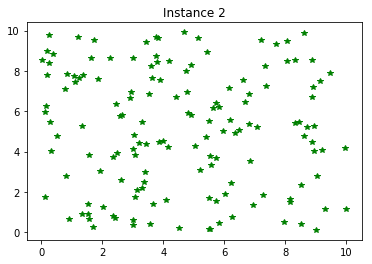

In [77]:
# TODO: WRITE YOUR CODES HERE

for i in range(3):
    z = np.random.poisson(lam=120)
    x = 10* np.random.random(z)
    y = 10* np.random.random(z)
    #plt.subplot(1,3,i+1)
    plt.plot(x,y,'g*')
    plt.title('Instance {}'.format(i))
    plt.show()

[TODO: ANSWER THE QUESTION HERE]

3.2.3
They realisations all look slightly different from one another. I am not surprised because this is a random process so number and location of points (new value for z, x and y) change with each instance changes.

**3.3.**

Write a script to compute the K-function for one of these realizations (or a new one). The procedure you will use is closely related to the calculations you did in the cholera example above, although there are some important differences.

* One difference is that you will be computing the distance from each observation to all other observations, rather than the distance from a lattice point to all other observations. The formula is as below
$$\hat{K}(h) = \frac{1}{z\lambda}(\sum_{i=1}^z \sum_{j \neq i} \mathbf{1}\{D(\overrightarrow{\underset{\cdot}{s_i}}, \overrightarrow{\underset{\cdot}{s_j}}) < h\})$$
* Another difference is that you will average your results over all points (why there is a double summation instead of just one) and output a graph of $K(h)$. Your final results is not a map but a function $K$ defined over distances $h$.
* For more on computing the K-function, see Lloyd 7.4.2.

Compute $K(h)$ for the integer values of $h=\{1,2,3...,7\}$. You don't need to try and compute every value in between. You can plot the K-function as a line using `plt.plot(h, K, '-')` (this interpolates for you). Overlay on this figure a plot of ${\pi \times h^2}$ using a different color (recall that this is the expected K-function for a PPP). How do they compare and why?

Notes: What we've done in the above blocks is copy-pasting lots of codes. Copy-pasting code is in general a bad practice and is strongly discouraged: (1) What if you want to change something about your codes (e.g., you realized later on that there is a bug somewhere)? You would need to fix it multiple times. (2) What if someone else (most likely your future self) wants to read your codes and understand what you were doing? They would then have to read the same block of codes over and over again (and wonder about whether there are small changes made to each copy).

What is encouraged, then, is to write functions. Functions keep your codes organized, easy to maintain, and recycleable. In earlier labs we will be nudging you to write functions by writing the docstrings for you, and in later labs we expect that you will be writing functions on your own.

In [78]:
def K(h, new=True, z=None, x=None, y=None):
    """Calculates the K function for different bandwidths.
    
    Args:
        h (numpy.ndarray): an array of bandwidths.
        new (bool): whether a new simulation should be carried out.
            if False, x, y, z arguments need to be supplied.
        x, y (numpy.ndarray): arrays containing x, y coordinates of the events.
        z (int): number of events in a realization of the simulation
    
    Returns:
        numpy.ndarray: a array of K(h), of the same length as h.
    """
    # these bool inputs (flags) control the behavior of the function
    # allowing you to write functions that, for example,
    # take different kinds of input
    if new:
        # TODO: WRITE CODES HERE TO COMPLETE THE SECTION
        z = np.random.poisson(lam=120)
        x = 10* np.random.random(120)
        y = 10* np.random.random(120)
    
        #pass
    # TODO: COMPLETE THIS FUNCTION
    K_hat = []
    distances = compute_distances(x, y, x, y)
    lamda = 1.2
    
    for hh in h:
        upt_dist = sum(sum(distances <= hh) - 1)
        K_hat.append(((1/(lamda*z))) * upt_dist)
        
    return K_hat

# TODO: USING THE FUNCTION, ANSWER THE QUESTION HERE
h = [i for i in range(1,8)]
K(h)
# x = 10* np.random.random(120)
# y = 10* np.random.random(120)
# K_hat = np.zeros(len(h))
# distances = compute_distances(x, y, x, y)
# lamda = 1.2
# for hh in range(1,len(h)+1):
#     print(sum(sum(distances <= hh) - 1))


[2.6366120218579234,
 9.781420765027322,
 19.18032786885246,
 31.51639344262295,
 43.49726775956284,
 56.13387978142077,
 69.0846994535519]

Text(0, 0.5, 'K(h)')

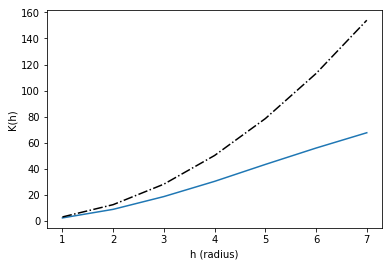

In [85]:
##  Overlay on this figure a plot of using a different color 
#(recall that this is the expected K-function for a PPP). How do they compare and why?
plt.plot(h, K(h), '-')
h = np.array(h)
plt.plot(h,np.pi*pow(h,2),'k-.')
plt.xlabel('h (radius)')
plt.ylabel('K(h)')  

[TODO: ANSWER THE QUESTION HERE]

3.3
The plots are both increasing although the simulated trajectory has a lot less of an increase that the circle estimate. This difference in behavior is most likely due to the edge effects where at the boundaries some points outside may not be counted even though they fall within the right distance metirc. These edge effects  are often ignored but can result in a biased estimate of the K- function. 

**3.4.**

**3.4.1.**

Now expand your script to simulate the PPP fifty times and calculate the K-function each time. Don't bother storing the $x$ and $y$ values to each simulation, just store the values of $K(h)$. Plot all 50 estimates for $K(h)$ on a single plot using a single color. Again, overlay on this figure a plot of $\pi \times h^2$ using a different color. **How do they compare and why?**

Text(0, 0.5, 'K(h)')

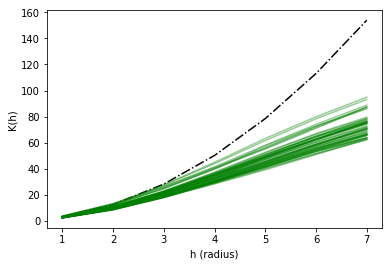

In [80]:
## I decided to call the function 5o times by calling same function
plt.plot(h,np.pi*pow(h,2),'k-.')
for i in range(50):
    plt.plot(h, K(h), 'g-', alpha = 0.4)
    h = np.array(h)
    
plt.xlabel('h (radius)')
plt.ylabel('K(h)')  

# the fifty simulations follow very similar patterns although the curves are different due 
# to the randomness of the underlying process

**3.4.2.**

The dataset `Lab3_poisson_test_data.p` contains location data from a different point process. We want to test if it is more or less clustered than a PPP. Compute the K-function for this dataset at the same values for $h$. Plot this K-function overlaid with your earlier plot of 50 K-functions from the simulated PPP (using a third color). **Does the testing data look more, less or similarly clustered to the PPP data?** Plot a map of the testing data to check whether your interpretation makes intuitive sense or not.

In [81]:
# TODO: WRITE YOUR CODES HERE
# LOAD DATA from Lab3_poisson_test_data.p 
with open('Lab3_poisson_test_data.p', 'rb') as f:
    # we load the file by calling pickle.load()
    # and then assign it to d, which is a short name that we gave to this dict
    data = pickle.load(f)
x_test = data['x_test']
y_test = data['y_test']

Text(0, 0.5, 'K(h)')

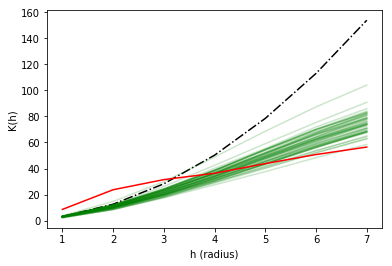

In [82]:
# TODO: PLOT TEST DATA HERE 
## plot test data overlaid on earlier plot of 50 K-functions from the simulated PPP 
plt.plot(h,np.pi*pow(h,2),'k-.')
for i in range(50):
    plt.plot(h, K(h), 'g-', alpha = 0.2)
    h = np.array(h)
    
plt.plot(h,K(h,  new=False, z=len(x_test), x=x_test, y=y_test),'r-')
plt.xlabel('h (radius)')
plt.ylabel('K(h)')

[TODO: ANSWER THE QUESTIONS HERE]

3.41
the fifty simulations follow very similar patterns although the curves are different due 
to the randomness of the underlying process. As such the each instance will create a curve that 
differs slightly from the previous although the simulations are run from the same distribution

3.42
The data seems to be a more clustered that the PPP data. This is because we observe higher numbers of points are located at shord distances(radius<3) compared to the PPP data. this implies more clusters in our test data. Based on later plots our assumptions seem intuitive.

Text(0.5, 1.0, 'Location of Test data')

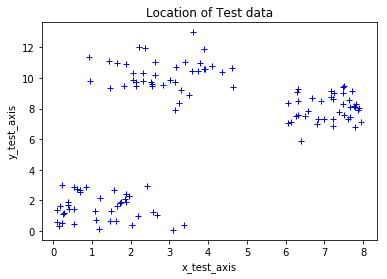

In [83]:
#plotting data to check rational
x_test = data['x_test']
y_test = data['y_test']
plt.plot(x_test,y_test,'b+')
plt.xlabel('x_test_axis')
plt.ylabel('y_test_axis')
plt.title('Location of Test data')

## Congratulations!
You've finished this lab!

* **Please list everyone you worked on this assignment with outside of public Piazza discussions.**
Coolaborators : Spencer Wilson